In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
datapath = f'../train.csv'
df = pd.read_csv(datapath)
df.head()

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...


In [6]:
df

,oid,category,text
0,365271984,winter_sport,Волшебные фото Виктория Поплавская ЕвгенияМедв...
1,503385563,extreme,Возвращение в подземелье Треша 33 Эйфория тупо...
2,146016084,football,Лучшие чешские вратари – Доминик Доминатор Гаш...
3,933865449,boardgames,Rtokenoid Warhammer40k валрак решил нас подкор...
4,713550145,hockey,Шестеркин затаскивает Рейнджерс в финал Восточ...
...,...,...,...
38735,910636962,autosport,8 битная буря снова накрыла пикселями автомоби...
38736,669736851,autosport,Ира Сидоркова объясняет как сказалась на ее ма...
38737,558919241,tennis,24 я ракетка мира хорват Марин Чилич обыграл и...
38738,776944963,volleyball,Стал известен календарь мужской сборной России...


## Categories

<AxesSubplot:xlabel='category'>

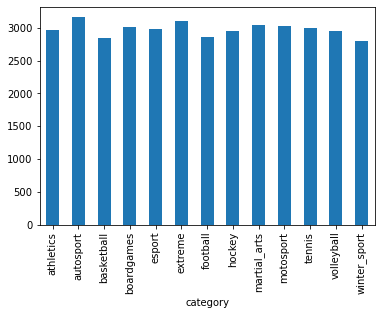

In [3]:
df.groupby(['category']).size().plot.bar()

## Len of texts

<AxesSubplot:ylabel='Frequency'>

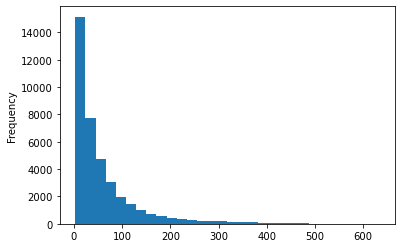

In [4]:
df['len'] = df.text.apply(lambda x: len(x.split(' ')))
df.len.plot.hist(bins=30)

In [5]:
df[df.len> 512]

,oid,category,text,len
2392,494350283,hockey,Итоги игрового дня Бостон – Каролина – 1 7 1 5...,583
10838,341768179,hockey,Пони бегает по кругу. . . Когда в 2011 году Ва...,530
27663,31870649,athletics,Мысли которые посещают каждого из нас на пробе...,517
30789,830106949,volleyball,На чемпионате мира 2022 завершился 1 й группов...,634


## labels

In [7]:
labels = dict(zip(df.category.unique(), list(range(len(df.category.unique())))))
labels

{'winter_sport': 0,
 'extreme': 1,
 'football': 2,
 'boardgames': 3,
 'hockey': 4,
 'esport': 5,
 'athletics': 6,
 'motosport': 7,
 'basketball': 8,
 'tennis': 9,
 'autosport': 10,
 'martial_arts': 11,
 'volleyball': 12}

## dublicates

In [8]:
df[~df.index.isin(df.drop_duplicates(subset=['text']).index)]

,oid,category,text,len
701,763759187,basketball,За кроссовками в Баскетбольный магазин Ghetto ...,11
794,340088263,boardgames,Коллеги традиционно объявляем очередной гильде...,51
852,606047569,basketball,За кроссовками в Баскетбольный магазин Ghetto ...,11
961,681660864,martial_arts,Похудеть возможно даже если. 1. Любишь сладкое...,116
995,846465790,basketball,За кроссовками в Баскетбольный магазин Ghetto ...,11
...,...,...,...,...
38678,424353857,athletics,Одна из самых выгодных карт 33 Обслуживание – ...,47
38700,551674788,motosport,Поздравляем с днем рождения железного человека...,39
38705,508008872,athletics,Вакансия HR менеджер. Обязанности 1. Ознакомле...,202
38717,509545488,esport,Счастливчики которые уносят Кассадина 33 За пр...,43


In [10]:
# example of dublicate
df[df.text=='60 дней Плюса Мульти в подарок по промокоду MYMUSIC 33 Если у вас когда то была подписка Плюс для вас он тоже сработает. Получите тысячи треков аудиокниги и топовые рекомендации которые подойдут именно вам 33']

,oid,category,text,len
1823,363941572,football,60 дней Плюса Мульти в подарок по промокоду MY...,35
15077,609061254,martial_arts,60 дней Плюса Мульти в подарок по промокоду MY...,35
15316,587012161,football,60 дней Плюса Мульти в подарок по промокоду MY...,35
26734,821548675,athletics,60 дней Плюса Мульти в подарок по промокоду MY...,35
27972,520121284,football,60 дней Плюса Мульти в подарок по промокоду MY...,35
30704,46432971,extreme,60 дней Плюса Мульти в подарок по промокоду MY...,35
34776,771299691,athletics,60 дней Плюса Мульти в подарок по промокоду MY...,35


In [11]:
# check for duplicates using groupby
df_nondupes = df.groupby(['text']).nunique().sort_values(by='category', ascending=False)
# find duplicates with target > 1 as a way of flagging if they are duplicate
df_dupes = df_nondupes[df_nondupes['category'] > 1]
df_dupes.rename(columns={'id':'# of duplicates', 'category':'sum of target var'})
df_dupes.sort_values('text')

,oid,category,len
text,,,
30 дней Okko бесплатно 33 Подключайтесь и смотрите популярные фильмы и сериалы в отличном качестве с доступом на 5 устройств,2,2,1
60 дней Плюса Мульти в подарок по промокоду MYMUSIC 33 Если у вас когда то была подписка Плюс для вас он тоже сработает. Получите миллионы треков аудиокниги и топовые рекомендации которые подойдут именно вам 33,4,3,1
60 дней Плюса Мульти в подарок по промокоду MYMUSIC 33 Если у вас когда то была подписка Плюс для вас он тоже сработает. Получите тысячи треков аудиокниги и топовые рекомендации которые подойдут именно вам 33,7,4,1
Python и Java изучаем языки программирования на практике 12 13 мая в 19. 00 ждем вас на практическом интенсиве по языкам Python и Java За два вечера изучим основы и напишем пару проектов которые сможете показывать работодателям. Научим даже тех кто никогда не прикасался к коду Регистрация по ссылке На интенсиве Расскажем чем занимаются Python разработчики Почему Python подойдет новичкам Как использовать полученные знания Отработаем навыки на тренажере Кто такой Java разработчик и чем он занимается. Какие навыки потребуются для старта в разработке. Как развивается карьера разработчиков почему их зарплаты растут так быстро. Пишем код и пробуем простейшее программирование. Регистрация по ссылке Бонусы для участников. Спикеры Илья Сазонов Руководитель направления tokenoid разработки во Всегда. Да Анастасия Борнева Руководитель направления по исследованию данных в Сбере. Скорее регистрируйтесь и встретимся в прямом эфире,2,2,1
Админ здравствуйте. Пропустите или нет – не знаю так как пост спорный конечно. Мой маленький сын уже больше 2х лет на химиотерапии. Онкология был рецидив. Лечимся в Москве сами из провинции. Никаких сборов не ведем так как лечимся по страховке. Не просим никакой помощи. Но и бесплатное лечение совсем не бесплатное кто лечился – знает. Не говоря об оплате жилья транспортных расходах и сопутствующих. На лечение хватает заработанного самостоятельно но есть проблема в работе. Сына в дет сад не отдашь – опасная среда для его иммунитета внутри имплантирован порт для вливания химии. Работаем из дома – выжигаем картины на дереве. Прошу опубликовать пост – уверена среди ваших подписчиков найдется человек ищущий подарок близким тем более я не беру предоплату. Если не хотите опубликовать бесплатно могу предложить выжечь в качестве оплаты рекламы вам портрет. Документы о лечении ссылку на группу поддержки сына скину в ЛС по вашему запросу. Спасибо.,3,2,1
...,...,...,...
﻿ ️Шутки в сторону 33 Сергей Кургинян о мобилизации и русском народе Ситуация когда Запад использует все возможности для того чтобы увеличить военный потенциал Украины когда Европа и США ведут с Россией экономическую и информационную войну является для нашей страны экзистенциальной. Выстоит ли Россия или Запад осуществит давнюю мечту и покончит с нею окончательно и бесповоротно? ️Сложившаяся ситуация взыскует мобилизации русского народа. Но в ходе спецоперации от добровольцев отбоя не было? Разве нет позорных толп молодежи бегущей из России в соседние страны? Разве нет провала под Харьковом где России пришлось оставить доверившихся нам людей? На вопросы о том почему не происходит подлинной мобилизации в российском обществе и российской элите и что нужно делать для того чтобы она началась ответил ⭐️ политолог философ и лидер движения Суть времени Сергей Кургинян в программе Сергея Мардана на Радио Комсомольская правда. ️По словам Кургиняна овцы не могут осуществить мобилизацию против волков. Справиться с этой задачей может лишь волкодав. Значит нужно убрать тех людей которые саботируют мобилизацию которые к ней не способны и найти людей совсем другого склада 33 Шутки кончились речь о выживании страны. . . Мобилизация ВСРФ Россия Кургинян Донбасс Война СВО Украина УГИЛ,2,2,1
﻿Американский педиатр разгромила гендерную теорию Кретелла врач с двадцатилетним стажем рассказывает о том почему трансгендерная идеология неверна. Врач рассказывает почему биологический пол невозможно назнач

## WordCloud

In [4]:
all_words = " ".join(review for review in df.text)

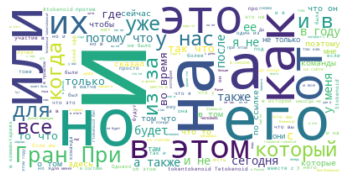

In [5]:
wordcloud = WordCloud(background_color="white").generate(all_words)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
datapath = f'../test.csv'
test = pd.read_csv(datapath)
test.head()

,oid,text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...
1,452466036,Естественное восстановление после тяжелой трен...
2,161038103,Тема нарядов продолжается Одна из британских ж...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...


In [8]:
test

,oid,text
0,749208109,СПОЧНО СООБЩЕСТВО ПРОДАЕТСЯ ЗА 1300Р ЗА ПОКУПК...
1,452466036,Естественное восстановление после тяжелой трен...
2,161038103,Тема нарядов продолжается Одна из британских ж...
3,663621910,Привет Избранный. Ты спрашиваешь себя ЧТО здес...
4,566255305,КОРОЛЬ ПЯТИСОТНИКОВ В ДЕЛЕ Андрей Рублев успеш...
...,...,...
26255,169728316,Выиграй коллекционный пазл по Wortokenoid of W...
26256,279369911,Волейбол от первого лица Егора Пупынина переко...
26257,600699419,Вы были когда нибудь на свидании где вам задав...
26258,560223506,ТОП 20 самых эффективных общефизических упражн...
